In [95]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats
V300=np.loadtxt("Desktop/300.vae",delimiter=",")

In [96]:
def VoidCorregido(ellip_cat):
    
    BoxLength = 720
    Trim = 30
    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

In [97]:
def elep(a,b,c):
    return (1/4)*(a**2 - c**2)/(a**2 + b**2 + c**2)
def prol(a,b,c):
    return (1/4)*((b**2 - c**2)+ (b**2 - a**2))/(a**2 + b**2 + c**2)
Vf300 = VoidCorregido(V300)
#300 km
a=Vf300[:,6]
b=Vf300[:,7]
c=Vf300[:,8]
e=1-c/a
elip300=elep(a,b,c)
prol300=prol(a,b,c)

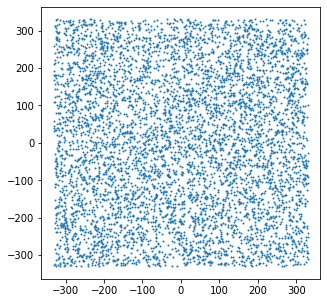

In [98]:
fig= plt.figure(figsize=(5,5))
plt.scatter(Vf300[:,1],Vf300[:,2],s=1)

Text(0.5, 1.0, 'Elipticidad')

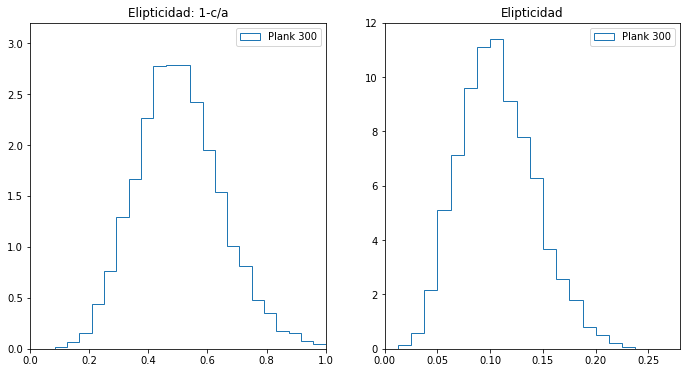

In [99]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
plt.hist(e,bins=np.linspace(0,1,25),density=True, histtype="step", label="Plank 300")
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,3.2)
plt.title("Elipticidad: 1-c/a")
ax2 = fig.add_subplot(132)
plt.hist(elip300,bins=np.linspace(0,0.3,25),density=True, histtype="step", label="Plank 300")
plt.legend(loc=0)    
plt.xlim(0,0.28)
plt.ylim(0,12)
plt.title("Elipticidad")

Text(0.5, 1.0, 'Elipticidad')

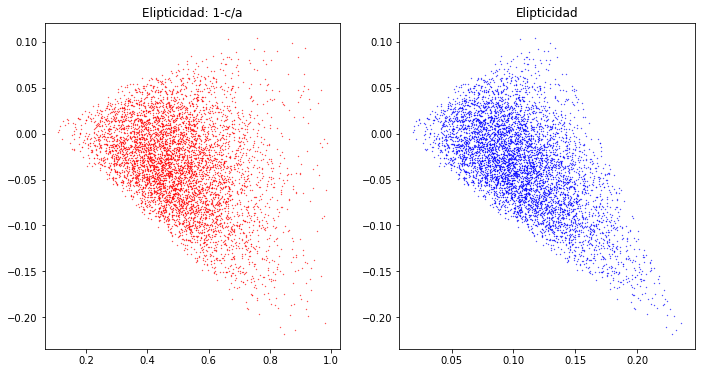

In [113]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
plt.scatter(e,prol300,s=0.1,c='red')
plt.title("Elipticidad: 1-c/a")

ax2 = fig.add_subplot(132)
plt.scatter(elip300,prol300,s=0.1,c='blue') 
plt.title("Elipticidad")

In [100]:
#Valor de la Media y los sigmas de error
def percentiles(data):
    return [np.abs(np.percentile(data,25)-np.percentile(data,50)),np.percentile(data,50),np.abs(np.percentile(data,75)-np.percentile(data,50))]
print(percentiles(e))
print(percentiles(elep300))
#To Do: Ubicar las rectas de estos percentiles en el gráfico y generar las desviaciones para escribir el dato

[0.09156210468563442, 0.4963295376156912, 0.09725746153226933]
[0.022561659188523486, 0.10455210463089953, 0.02601878434695079]


Text(0.5, 1.0, 'Elipticidad')

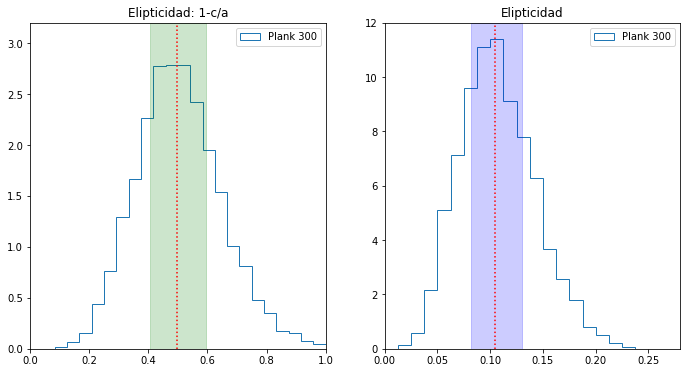

In [123]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
plt.hist(e,bins=np.linspace(0,1,25),density=True, histtype="step", label="Plank 300")
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,3.2)
plt.axvline(percentiles(e)[1],ls='dotted',c='red')
plt.axvspan(percentiles(e)[1]-percentiles(e)[0],percentiles(e)[1]+percentiles(e)[2],alpha=0.2,color='g')
plt.title("Elipticidad: 1-c/a")

ax2 = fig.add_subplot(132)
plt.hist(elip300,bins=np.linspace(0,0.3,25),density=True, histtype="step", label="Plank 300")
plt.legend(loc=0)    
plt.xlim(0,0.28)
plt.ylim(0,12)
plt.axvline(percentiles(elip300)[1],ls='dotted',c='red')
plt.axvspan(percentiles(elip300)[1]-percentiles(elip300)[0],percentiles(elip300)[1]+percentiles(elip300)[2],alpha=0.2,color='b')
plt.title("Elipticidad")

Text(0.5, 1.0, 'Elipticidad')

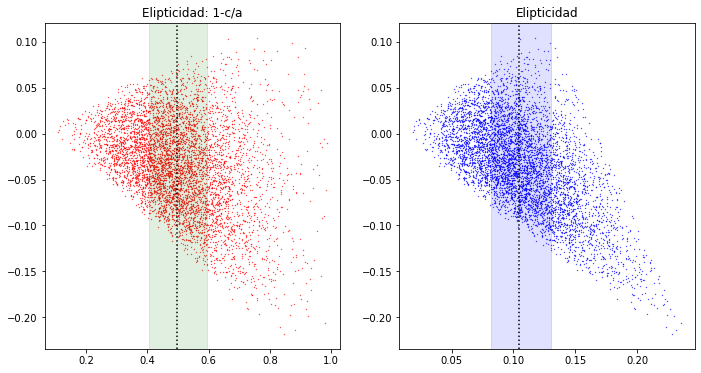

In [125]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131)
plt.scatter(e,prol300,s=0.1,c='red')
plt.axvline(percentiles(e)[1],ls='dotted',c='black')
plt.axvspan(percentiles(e)[1]-percentiles(e)[0],percentiles(e)[1]+percentiles(e)[2],alpha=0.12,color='g')
plt.title("Elipticidad: 1-c/a")

ax2 = fig.add_subplot(132)
plt.scatter(elip300,prol300,s=0.1,c='blue') 
plt.axvline(percentiles(elip300)[1],ls='dotted',c='black')
plt.axvspan(percentiles(elip300)[1]-percentiles(elip300)[0],percentiles(elip300)[1]+percentiles(elip300)[2],alpha=0.12,color='b')
plt.title("Elipticidad")

In [101]:
#Cálculo del Radio Máximo de los Voids
Rmax=np.max(Vf300[:,5])
print(Rmax)

59.78740149137074


In [102]:
#Fracción del Volumen: Ecuaciones De Volumen
def vol(a,b,c):
    return a*b*c*(4*np.pi/3)

In [103]:
v=vol(a,b,c)
print(np.max(v))

895194.9926222122


In [104]:
index = np.where(Vf300[:,5]==np.max(Vf300[:,5]))
resta = Rmax - (Vf300[[index[0][0]],5][0])
print("Volumen en la posición " + str(index[0][0])+" es: " +str(v[index[0][0]]))
print("Radio de la posición "+ str(index[0][0])+" es: " + str((Vf300[[index[0][0]],5][0])))
print("Comparando estos radios: " + str(resta))
#To Do: Ubicar el Void en el gráfico con otro color

Volumen en la posición 29 es: 895194.9926222122
Radio de la posición 29 es: 59.78740149137074
Comparando estos radios: 0.0


Text(0.5, 1.0, 'Volumen Hist (V/2000)')

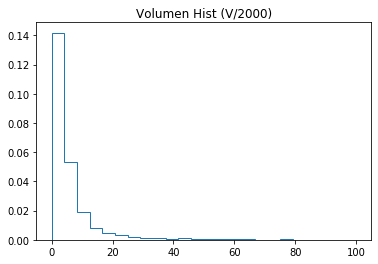

In [129]:
plt.hist(v/2000,bins=np.linspace(0,100,25),density=True, histtype="step", label="Plank 300")
plt.title('Volumen Hist (V/2000)')

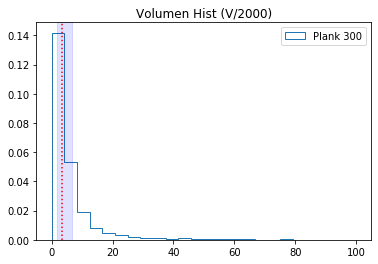

In [133]:
plt.hist(v/2000,bins=np.linspace(0,100,25),density=True, histtype="step", label="Plank 300")
plt.axvline(percentiles(v/2000)[1],ls = 'dotted',c='red')
plt.axvspan(percentiles(v/2000)[1]-percentiles(v/2000)[0],percentiles(v/2000)[1]+percentiles(v/2000)[2],alpha=0.12,color='b')
plt.title('Volumen Hist (V/2000)')
plt.legend(loc=0)

In [131]:
percentiles(v/2000)

[1.6524632833271797, 3.3760396324159374, 3.195499771135777]

In [106]:
#Fracción del Volumen
Vvoids = np.sum(v)
Vtotal = 720**3
print("Fracción del Volumen = " + str(Vvoids/Vtotal))

Fracción del Volumen = 0.21115243214129203


In [107]:
#Función de Correlación de los Datos de Elipticidad
auto = np.correlate(e,e,mode='full')
auto = auto[-e.size:]

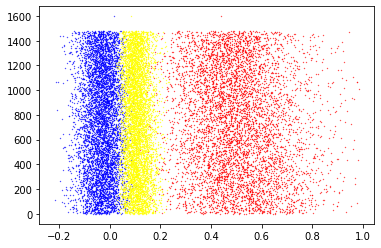

In [108]:
plt.scatter(prol300,auto,s=0.1,c='blue')
plt.scatter(e,auto,s=0.1,c='red')
plt.scatter(elip300,auto,s=0.1,c='yellow')